In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd/solarpanels_hd_3__x0_15224_y0_24408_dxdy_832.txt
/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd/solarpanels_hd_1__x0_8759_y0_26394_dxdy_832.txt
/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd/solarpanels_hd_2__x0_26668_y0_10669_dxdy_832.txt
/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd/solarpanels_hd_2__x0_19313_y0_22315_dxdy_832.txt
/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd/solarpanels_hd_1__x0_16242_y0_21036_dxdy_832.txt
/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd/solarpanels_hd_1__x0_16672_y0_16986_dxdy_832.txt
/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd/solarpanels_hd_1__x0_1162_y0_14668_dxdy_832.txt
/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd/solarpanels

# Dataset Exploration and Understanding

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

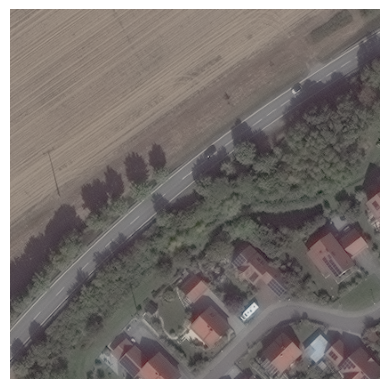

In [2]:
image_path = '/kaggle/input/solar-panel-detection/image_chips_native-20250212T103727Z-001/image_chips_native/solarpanels_native_1__x0_0_y0_6845_dxdy_416.tif'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
label_path = '/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_native/solarpanels_native_1__x0_0_y0_6845_dxdy_416.txt'

with open(label_path, 'r') as file:
    lines = file.readlines()

for line in lines[:10]:
    print(line.strip())

0 0.8725961538461539 0.7007211538461539 0.057692307692307696 0.05528846153846154
0 0.6201923076923077 0.6826923076923077 0.04326923076923077 0.038461538461538464
0 0.7235576923076924 0.7548076923076924 0.05288461538461539 0.05288461538461539
0 0.875 0.9350961538461539 0.028846153846153848 0.028846153846153848
0 0.9158653846153847 0.9591346153846154 0.04326923076923077 0.03365384615384616
0 0.9627403846153847 0.9963942307692308 0.040865384615384616 0.007211538461538462
0 0.3245192307692308 0.9663461538461539 0.057692307692307696 0.0625
0 0.6586538461538461 0.7223557692307693 0.038461538461538464 0.03125


How to see the bounded boxes in the image? By plotting these boxes in the corresponding image...

416 416


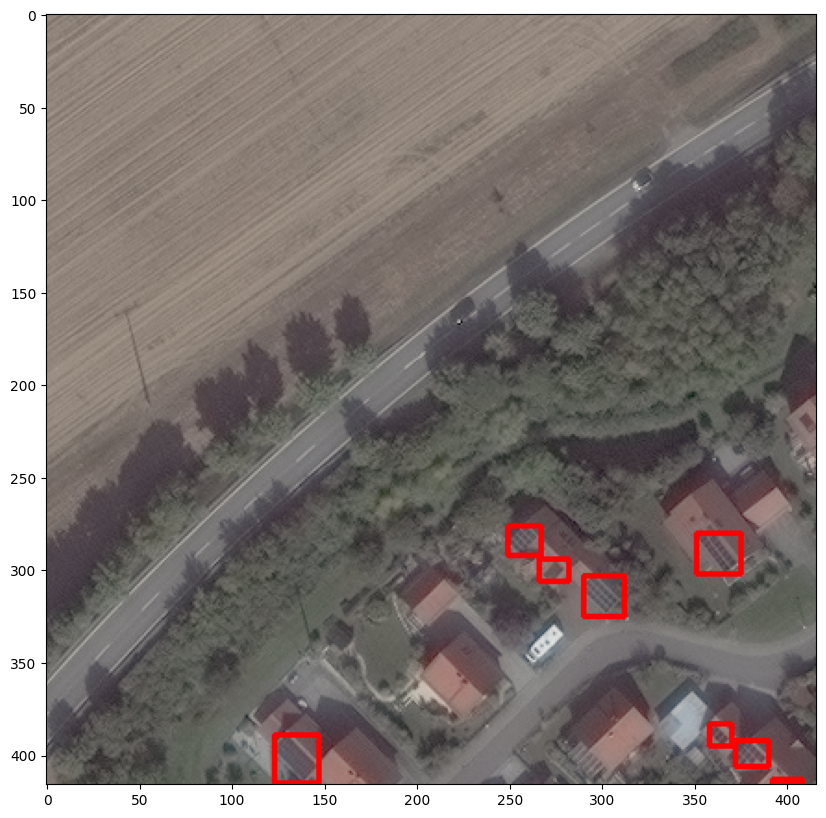

In [4]:
import cv2

#We have image_path and label_path from the execution before
image = cv2.imread(image_path) #this is in bgr format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape

print(height, width)

#Draw the bounded boxes
for line in lines:
    class_id, x_c, y_c, box_width, box_height = map(float, line.split())

    x_center, y_center = int(x_c * width), int(y_c * height)
    box_width, box_height = int(box_width * width), int(box_height * height)

    #top-left 
    x1, y1 = x_center - box_width //2 , y_center - box_height//2
    #bottom-right
    x2, y2 = x_center + box_width //2 , y_center + box_height//2

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0 ), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

dimensions: 416x416


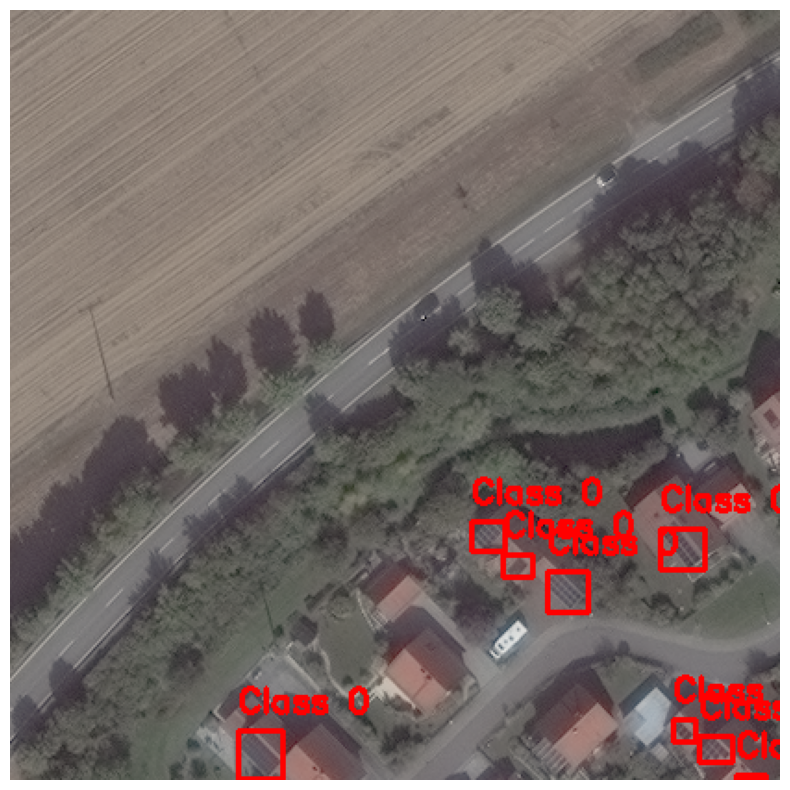

In [5]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(image_path) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape
print(f"dimensions: {height}x{width}")

color_map = {
    0: (255, 0, 0),    
    1: (0, 255, 0),    
    2: (0, 0, 255), 
}

# Drawing bounding boxes
for line in lines:
    class_id, x_c, y_c, box_width, box_height = map(float, line.split())

    x_center, y_center = int(x_c * width), int(y_c * height)
    box_width, box_height = int(box_width * width), int(box_height * height)

    # box coordinates 
    x1, y1 = x_center - box_width // 2, y_center - box_height // 2
    x2, y2 = x_center + box_width // 2, y_center + box_height // 2

    color = color_map.get(int(class_id), (255, 255, 255))  # Default color White

    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(
        image,
        f"Class {int(class_id)}",
        (x1, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        color,
        2
    )

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()


# Dataset Statistics

## How many instances of solar panels are present in the dataset?


In [6]:
#for this we will have to iterate through the label txt files and find how many bounding boxes are there in the thing
import os
#function for counting instances
def count(label_folder_path):
    total = 0;
    for label_file in os.listdir(label_folder_path):
        file_path = os.path.join(label_folder_path, label_file)
        if label_file.endswith('.txt'):
            with open(file_path, 'r') as file:
                lines = file.readlines()
                total += len(lines)
    return total
        
native_path = '/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_native'
hd_path = '/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd'

instances_native = count(native_path)
instances_hd = count(hd_path)
total_instances = instances_native + instances_hd

print(f"Native Instances = {instances_native}")
print(f"Hd Instances = {instances_hd}")
print(f"Total_Instances = {total_instances}")

Native Instances = 29625
Hd Instances = 29880
Total_Instances = 59505


# Check how many different classes are there in the labels?

In [7]:
import numpy as np
import glob

native_path = '/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_native'
label_files = glob.glob(f"{native_path}/*.txt")

unique_classes = set()

# Iterate over all label files and extract class IDs
for label_file in label_files:
    data = np.loadtxt(label_file).reshape(-1, 5)  # Assuming YOLO format: class x_center y_center width height
    if data.size > 0:
        class_ids = data[:, 0].astype(int)
        unique_classes.update(class_ids)

print(f"🔍 Unique class IDs in native labels: {unique_classes}")
print(f"🎯 Total number of classes: {len(unique_classes)}")


🔍 Unique class IDs in native labels: {0, 1, 2}
🎯 Total number of classes: 3


### Later we will ignore this classes as the labels 1 and 2 are very much less occuring as compared to class 0 

## b. Compute and show the value counts of labels per image. E.g., X images have 0 labels, Y images have 1 label, … and so on.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


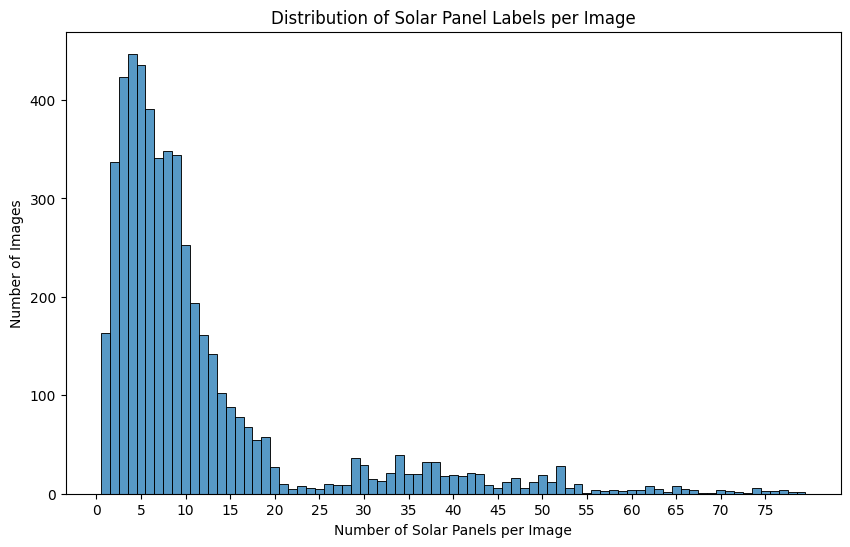

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def get_labels_per_image(label_folder_path):
    labels_per_image = {}  

    for label_file in os.listdir(label_folder_path):
        file_path = os.path.join(label_folder_path, label_file)
        if label_file.endswith(".txt"):  
            with open(file_path, 'r') as file:
                lines = file.readlines()
                labels_per_image[label_file] = len(lines)  
    return labels_per_image

native_labels = get_labels_per_image("/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_native")
hd_labels = get_labels_per_image("/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd")
all_labels = {**native_labels, **hd_labels} # ** is for making joining the two dictionaries
label_counts = list(all_labels.values())

plt.figure(figsize=(10, 6))
sns.histplot(label_counts, bins=range(0, max(label_counts) + 2), discrete=True, kde=False)
plt.xlabel("Number of Solar Panels per Image")
plt.ylabel("Number of Images")
plt.title("Distribution of Solar Panel Labels per Image")
plt.xticks(range(0, max(label_counts) + 1, 5))  
plt.show()


# Calculate Statistics

## What method was used to compute the area (in meters) for a single instance?


In [11]:
#Area is calculated = height * width
#Given 31cm native and 15.5 cm hd resolution
pixel_weight_native = 0.31
pixel_weight_hd = 0.155

    
def calculate_area(width, height, pixel_size):

    width_actual = pixel_size * width
    height_actual = pixel_size * height

    area = width_actual * height_actual
    return area

## Find mean area and Standard Deviation?

In [12]:
import numpy as np
import os

def get_areas(path, pixel_size, image_size):
    areas = []

    for label_path in os.listdir(path):
        file_path = os.path.join(path, label_path)
        if label_path.endswith('.txt'):
            with open(file_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    vals = line.strip().split()
                    _, _, _, width, height = map(float, vals)  # Extracting normalized width & height 
                    
                    width_pixels = width * image_size  
                    height_pixels = height * image_size  

                    area = calculate_area(width_pixels, height_pixels, pixel_size)
                    areas.append(area)

    return areas

areas_native = get_areas('/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_native', 
                         0.31, 416)
areas_hd = get_areas('/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_hd', 
                     0.155, 832)

total_areas = areas_native + areas_hd

mean_of_area = np.mean(total_areas)
sd_of_area = np.std(total_areas)

print(f"Mean of Areas = {mean_of_area}")
print(f"Standard Deviation of Areas = {sd_of_area}")

#Since in the following part of the project we are dealing with only the native values, I am also displaying the mean and standard deviation of native images areas only
mean_area_native = np.mean(areas_native);
sd_of_area_native = np.std(areas_native);

print(f"Mean of Areas = {mean_area_native}")
print(f"Standard Deviation of Areas = {np.std(areas_native) = }")


Mean of Areas = 190.06945266406186
Standard Deviation of Areas = 619.1780031558636
Mean of Areas = 191.51782786497895
Standard Deviation of Areas = np.std(areas_native) = 630.7003355500087


## c. Plot the histogram of areas. What do you observe?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


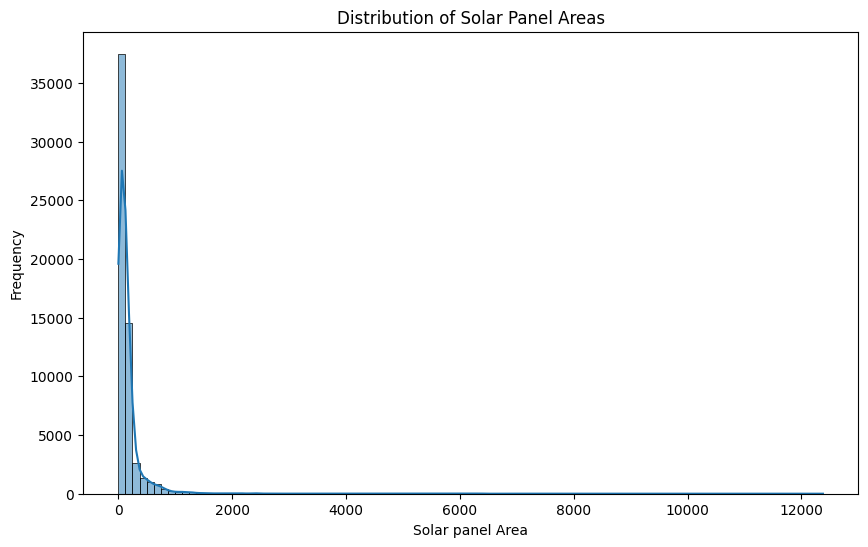

In [13]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(total_areas, bins=100, kde = True)

plt.xlabel("Solar panel Area")
plt.ylabel("Frequency")

plt.title("Distribution of Solar Panel Areas")

plt.show()

# Observations

The key observations we make from this plot are:
 - Distribution is Highly Skewed towards Rightside
 - Only very few solar panels have comparatively large areas, very rare solar panels with large areas
 - Majority of the areas are small, that is highest frequency is of solar panels with smaller areas (0 - 500)

# Implementing the Fundamental Functions


# IOU

In [15]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 4.5 MB/s eta 0:00:00a 0:00:01


In [16]:
#first for making rectangles we want to get the x_min, x_max, y_min, y_max
import numpy as np
import supervision as sv
from shapely.geometry import Polygon

def get_corners(box):
    #box has shape(x_c, y_c, width, height)
    x_c, y_c, width, height = box
    x_min = x_c - width / 2
    x_max = x_c + width / 2
    y_min = y_c - height / 2
    y_max = y_c + height / 2

    return x_min, y_min, x_max, y_max  # Correct order


def calculate_iou_shapely(box1, box2):
    x1_min, y1_min, x1_max, y1_max = get_corners(box1)
    x2_min, y2_min, x2_max, y2_max = get_corners(box2)

    poly1 = Polygon([(x1_min, y1_min), (x1_max, y1_min), (x1_max, y1_max), (x1_min, y1_max)])
    poly2 = Polygon([(x2_min, y2_min), (x2_max, y2_min), (x2_max, y2_max), (x2_min, y2_max)])

    intersect = poly1.intersection(poly2).area
    union = poly1.union(poly2).area

    if union>0:
        iou = intersect / union
    else:
        iou = 0

    return iou

def calculate_iou_supervision(box1, box2):
    x1_min, y1_min, x1_max, y1_max = get_corners(box1)
    x2_min, y2_min, x2_max, y2_max = get_corners(box2)

    box1_sv = np.array([[x1_min, y1_min, x1_max, y1_max]])
    box2_sv = np.array([[x2_min, y2_min, x2_max, y2_max]])

    iou_sv = sv.detection.utils.box_iou_batch(box1_sv, box2_sv)
    return iou_sv[0,0]


box1 = (100, 100, 50, 50)
box2 = (110, 110, 50, 50)

iou_shapely = calculate_iou_shapely(box1, box2)
iou_supervision = calculate_iou_supervision(box1, box2)

print(f"IoU (Shapely): {iou_shapely:.4f}")
print(f"IoU (Supervision): {iou_supervision:.4f}")

IoU (Shapely): 0.4706
IoU (Supervision): 0.4706


# Average Precision

### Use Pascal VOC 11 point interpolation method to implement the function 


In [17]:
def calculate_AP_VOC11(recalls, precision):
  levels = np.linspace(0.0, 1.0, 11)

  interpolations = []

  for threshold in levels:
    precisions_above = precision[recalls>=threshold]

    if precisions_above.size>0:
      max_precisions_above = np.max(precisions_above)
    else:
      max_precisions_above = 0.0

    interpolations.append(max_precisions_above)

  return np.mean(interpolations)

#sample
recalls = np.array([0.0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9, 1.0])
precisions = np.array([1.0, 0.9, 0.85, 0.8, 0.75, 0.7, 0.6, 0.5, 0.4])

ap_score = calculate_AP_VOC11(recalls, precisions)
print(f"Average Precision (AP): {ap_score:.4f}")

Average Precision (AP): 0.7000


## Use COCO 101-point interpolation method to implement the function

In [18]:
def calculate_AP_COCO101(recalls, precision):
  levels = np.linspace(0.0, 1.0, 101)

  interpolations = []

  for threshold in levels:
    precisions_above = precision[recalls>=threshold]

    if precisions_above.size>0:
      max_precisions_above = np.max(precisions_above)
    else:
      max_precisions_above = 0.0

    interpolations.append(max_precisions_above)

  return np.mean(interpolations)

#sample
recalls = np.array([0.0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9, 1.0])
precisions = np.array([1.0, 0.9, 0.85, 0.8, 0.75, 0.7, 0.6, 0.5, 0.4])

ap_score = calculate_AP_COCO101(recalls, precisions)
print(f"Average Precision (AP): {ap_score:.4f}")


Average Precision (AP): 0.6881


## Use Area under Precision-Recall Curve (AP) method to implement the function


In [19]:
import numpy as np

def calculate_ap(recalls, precisions):
    recalls, precisions = zip(*sorted(zip(recalls, precisions))) #we are sorting because precision-recall data is given at various thresholds and precision should be with increasing recall
    recalls = np.array(recalls)
    precisions = np.array(precisions)

    # Using trapezoidal rule
    ap = np.sum((recalls[1:] - recalls[:-1]) * (precisions[1:] + precisions[:-1]) / 2)
    return ap

# sample
recalls = np.array([0.0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.8, 0.9, 1.0])
precisions = np.array([1.0, 0.9, 0.85, 0.8, 0.75, 0.7, 0.6, 0.5, 0.4])

ap_score = calculate_ap(recalls, precisions)
print(f"Average Precision (AP): {ap_score:.4f}")


Average Precision (AP): 0.7225


## Randomly generate 10 images of size 100x100. Randomly generate 10 ground truth boxes of size 20x20 and 10 predicted boxes of size 20x20 in each image. Assume there is only one class of objects. Compare the AP50 (Average Precision at IoU 0.5) computed by 3 of your methods


In [20]:
def generate_random_box(image_size, num_boxes, box_size):
  boxes = []
  for _ in range(num_boxes):
    x_c = np.random.randint(box_size // 2, image_size[0] - box_size // 2)
    y_c = np.random.randint(box_size // 2, image_size[1] - box_size // 2)
    boxes.append((x_c,y_c, box_size, box_size)) #(x_center, y_center, width, height)
  return boxes

img_size = (100, 100)
num_boxes = 10
box_size = 20

truth_boxes = generate_random_box(img_size, num_boxes, box_size)
pred_boxes = generate_random_box(img_size, num_boxes, box_size)

confidence_scores = np.random.rand(num_boxes) #this is required to prioritize high priority predictions

ious = []
for i in pred_boxes:
  ious_pred = []
  for j in truth_boxes:
    ious_pred.append(calculate_iou_shapely(i, j))
  ious.append(ious_pred)

threshold_iou = 0.5
tp = np.zeros(num_boxes)
fp = np.zeros(num_boxes)
truth_matched = np.zeros(num_boxes)

sorted_indices = np.argsort(confidence_scores)[::-1]

for i in sorted_indices:
  max_iou = np.max(ious[i])
  max_iou_index = np.argmax(ious[i])

  if(max_iou >= threshold_iou):
    if(truth_matched[max_iou_index] == 0):
      tp[i] = 1
      truth_matched[max_iou_index] = 1
    else:
      fp[i] = 1

cumulative_tp = np.cumsum(tp)
cumulative_fp = np.cumsum(fp)
recall = cumulative_tp / num_boxes
precision = np.divide(cumulative_tp, cumulative_tp + cumulative_fp, where=(cumulative_tp + cumulative_fp) != 0)

ap_voc = calculate_AP_VOC11(recall, precision)
ap_coco = calculate_AP_COCO101(recall, precision)
ap_trap = calculate_ap(recall, precision)

print(f"AP (VOC11) = {ap_voc:.4f}")
print(f"AP (COCO101) = {ap_coco:.4f}")
print(f"AP (Trapezoidal) = {ap_trap:.4f}")

AP (VOC11) = 0.0909
AP (COCO101) = 0.0545
AP (Trapezoidal) = 0.0250


# Model Building and Predictions

---



## Split the dataset into 80 - 20 test train split and 10% as validation

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
input_dir = '/kaggle/input/solar-panel-detection/image_chips_native-20250212T103727Z-001/image_chips_native'
working_dir = '/kaggle/working/image_chips_native'
labels_dir = '/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_native'

#if  the datset is not there in the working directory
if not os.path.exists(working_dir):
    shutil.copytree(input_dir, working_dir)
    print("Dataset has been copied to working directory.")

# We will remove redundant images ending with '(1).tif'
#This is done because somehow some images got downloaded twice in the dataset and by default they were saved in (1).tif format
for file in os.listdir(working_dir):
    if file.endswith('(1).tif'):
        os.remove(os.path.join(working_dir, file))
        print(f"Deleted image: {file}")

# get image and label file paths
image_files = [f for f in os.listdir(working_dir) if f.endswith('.tif')]
image_paths = [os.path.join(working_dir, f) for f in image_files]
label_paths = [os.path.join(labels_dir, f.replace('.tif', '.txt')) for f in image_files]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(image_paths, label_paths, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# print lengths of training, val and test sections
print(f"Training: {len(X_train)}, Validation: {len(X_val)}, Testing: {len(X_test)}")


Training: 1829, Validation: 204, Testing: 509


#### Check the number of labels with class 0, 1 and 2

In [5]:
import os

# Paths
labels_native_path = '/kaggle/input/solar-panel-detection/labels-20250212T103318Z-001/labels/labels_native'

count_0 = 0
count_1 = 0
count_2 = 0

for label_name in os.listdir(labels_native_path):
    label_path = os.path.join(labels_native_path, label_name)

    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, _, _, _, _ = map(float, line.strip().split())
            if int(cls) == 0:
                count_0 += 1
            elif int(cls) == 1:
                count_1 += 1
            elif int(cls) == 2:
                count_2 += 1

print(f"Class 0 count: {count_0}")
print(f"Class 1 count: {count_1}")
print(f"Class 2 count: {count_2}")


Class 0 count: 29267
Class 1 count: 130
Class 2 count: 228


# Build a YOLO model

In [6]:
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 28.9 MB/s eta 0:00:00


## Preprocess the data
### Move train, test, val into seperate folders

In [7]:
import os
import shutil

os.makedirs('/kaggle/working/dataset/images/train', exist_ok=True)
os.makedirs('/kaggle/working/dataset/images/val', exist_ok=True)
os.makedirs('/kaggle/working/dataset/images/test', exist_ok=True)

os.makedirs('/kaggle/working/dataset/labels/train', exist_ok=True)
os.makedirs('/kaggle/working/dataset/labels/val', exist_ok=True)
os.makedirs('/kaggle/working/dataset/labels/test', exist_ok=True)

for img_path, lbl_path in zip(X_train, y_train):
    shutil.copy(img_path, '/kaggle/working/dataset/images/train/')
    shutil.copy(lbl_path, '/kaggle/working/dataset/labels/train/')

for img_path, lbl_path in zip(X_val, y_val):
    shutil.copy(img_path, '/kaggle/working/dataset/images/val/')
    shutil.copy(lbl_path, '/kaggle/working/dataset/labels/val/')

for img_path, lbl_path in zip(X_test, y_test):
    shutil.copy(img_path, '/kaggle/working/dataset/images/test/')
    shutil.copy(lbl_path, '/kaggle/working/dataset/labels/test/')

print("✅ Dataset successfully made in working directory")


✅ Dataset successfully made in working directory


### Convert all the classes to be zero

In [8]:
import os
import numpy as np

# Function to set class IDs to 0 in label files
def set_class_ids_to_zero(label_dir):
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]
    
    for label_file in label_files:
        label_path = os.path.join(label_dir, label_file)
        data = np.loadtxt(label_path).reshape(-1, 5)  
        if data.size > 0:
            data[:, 0] = 0  # Set all class IDs to 0
            np.savetxt(label_path, data, fmt="%.6f")  

# Directories to update
train_labels_dir = '/kaggle/working/dataset/labels/train'
val_labels_dir = '/kaggle/working/dataset/labels/val'
test_labels_dir = '/kaggle/working/dataset/labels/test'

set_class_ids_to_zero(train_labels_dir)
set_class_ids_to_zero(val_labels_dir)
set_class_ids_to_zero(test_labels_dir)

print("All class IDs set to 0 in training, validation, and testing labels.")


All class IDs set to 0 in training, validation, and testing labels.


In [9]:
import os
import numpy as np

def get_unique_classes_from_labels(label_dir):
    unique_classes = set()
    label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]
    
    for label_file in label_files:
        label_path = os.path.join(label_dir, label_file)
        data = np.loadtxt(label_path).reshape(-1, 5)  
        if data.size > 0:
            class_ids = data[:, 0].astype(int)
            unique_classes.update(class_ids)
    
    return unique_classes

# Directories to check
train_labels_dir = '/kaggle/working/dataset/labels/train'
val_labels_dir = '/kaggle/working/dataset/labels/val'
test_labels_dir = '/kaggle/working/dataset/labels/test'

# Get unique classes for each directory
train_classes = get_unique_classes_from_labels(train_labels_dir)
val_classes = get_unique_classes_from_labels(val_labels_dir)
test_classes = get_unique_classes_from_labels(test_labels_dir)

# Print the unique classes for each dataset
print(f"Unique classes in training labels: {train_classes}")
print(f"Unique classes in validation labels: {val_classes}")
print(f"Unique classes in testing labels: {test_classes}")


Unique classes in training labels: {0}
Unique classes in validation labels: {0}
Unique classes in testing labels: {0}


In [10]:
# Make the yaml file

import os
import yaml

data = {
    'train': '/kaggle/working/dataset/images/train',
    'val': '/kaggle/working/dataset/images/val',
    'test': '/kaggle/working/dataset/images/test',
    'nc': 1,  # n_classes
    'names': ['solar_panel']  # Class names
}

yaml_file_path = "/kaggle/working/dataset/data.yaml"

# while re running the code if the yaml file already exists it was giving error
#So for that we remove any yaml file if already exists and then create it again
if os.path.exists(yaml_file_path):
    os.remove(yaml_file_path)
    print(f"The past yaml file removed: {yaml_file_path}")

os.makedirs("/kaggle/working/dataset", exist_ok=True)
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

print(f"New data.yaml created at: {yaml_file_path}")


New data.yaml created at: /kaggle/working/dataset/data.yaml


# Model Setup

In [11]:
import torch
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import os

model = YOLO('yolov8n.yaml')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Train the model

In [12]:
 
results = model.train(
    data='/kaggle/working/dataset/data.yaml',  # Dataset YAML path
    epochs=50,
    batch=16,
    imgsz=416,
    project='/kaggle/working/yolo_training',  # Saving logs and weights here
    name='solar_panel_detection',
    exist_ok=True,
    verbose=True,
    optimizer='Adam',
    plots = True,
    lr0=0.01,
    lrf=0.1,
    patience=10,
)

## Save the trained model to avoid retraining in future sessions
weights_dir = '/kaggle/working/yolo_training/solar_panel_detection/weights'
output_backup_dir = '/kaggle/outputs/solar_panel_model_backup'
os.makedirs(output_backup_dir, exist_ok=True)

shutil.copy(os.path.join(weights_dir, 'best.pt'), os.path.join(output_backup_dir, 'best.pt'))
shutil.copy(os.path.join(weights_dir, 'last.pt'), os.path.join(output_backup_dir, 'last.pt'))
print(f"Model weights are saved at: {output_backup_dir}")



Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/working/dataset/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/yolo_training, name=solar_panel_detection, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

100%|██████████| 755k/755k [00:00<00:00, 48.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 167MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/labels/train... 1829 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1829/1829 [00:02<00:00, 769.28it/s]


train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/dataset/labels/val... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 652.84it/s]

val: New cache created: /kaggle/working/dataset/labels/val.cache


Plotting labels to /kaggle/working/yolo_training/solar_panel_detection/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to /kaggle/working/yolo_training/solar_panel_detection
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       1.3G      4.174      2.955      2.673         94        416: 100%|██████████| 115/115 [00:14<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        204       2232    0.00504     0.0659    0.00165   0.000573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.25G      3.237       2.49      1.996         58        416: 100%|██████████| 115/115 [00:13<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]

                   all        204       2232      0.193      0.161     0.0853     0.0231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.32G       2.87      2.241      1.806         67        416: 100%|██████████| 115/115 [00:13<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.14it/s]

                   all        204       2232      0.158       0.31      0.119     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.3G      2.738      2.096      1.741         48        416: 100%|██████████| 115/115 [00:12<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.78it/s]

                   all        204       2232      0.266      0.239      0.186     0.0726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.16G      2.568      1.923      1.653        144        416: 100%|██████████| 115/115 [00:12<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.02it/s]

                   all        204       2232      0.266      0.375      0.181     0.0709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.33G        2.4      1.793      1.586         77        416: 100%|██████████| 115/115 [00:12<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.32it/s]


                   all        204       2232      0.391      0.328      0.301       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.21G       2.26      1.657      1.531         70        416: 100%|██████████| 115/115 [00:12<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.30it/s]


                   all        204       2232      0.505      0.425      0.415        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.31G       2.21      1.598      1.515         46        416: 100%|██████████| 115/115 [00:12<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.69it/s]


                   all        204       2232      0.532      0.439      0.459      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.22G      2.114      1.541      1.464         67        416: 100%|██████████| 115/115 [00:12<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.33it/s]

                   all        204       2232      0.548      0.455      0.478      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.34G       2.02      1.449      1.427         99        416: 100%|██████████| 115/115 [00:12<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]


                   all        204       2232      0.597      0.456      0.504      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.2G      1.959      1.396      1.395         28        416: 100%|██████████| 115/115 [00:12<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.59it/s]


                   all        204       2232      0.642      0.529      0.582      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.32G      1.922      1.341      1.381         84        416: 100%|██████████| 115/115 [00:12<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.34it/s]

                   all        204       2232      0.647      0.548      0.598      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.38G       1.87      1.295      1.365         83        416: 100%|██████████| 115/115 [00:12<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.52it/s]


                   all        204       2232      0.671      0.544       0.61      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.37G      1.873      1.278       1.35        103        416: 100%|██████████| 115/115 [00:12<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.97it/s]

                   all        204       2232      0.478       0.57      0.404      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.54G        1.8      1.205      1.332         57        416: 100%|██████████| 115/115 [00:12<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.69it/s]


                   all        204       2232      0.739      0.591      0.673      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.21G      1.756      1.192      1.309         43        416: 100%|██████████| 115/115 [00:12<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.63it/s]


                   all        204       2232      0.698      0.579       0.67      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.21G      1.738      1.204      1.309         92        416: 100%|██████████| 115/115 [00:12<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]


                   all        204       2232      0.725      0.611      0.686       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.5G      1.693       1.14      1.277         63        416: 100%|██████████| 115/115 [00:12<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.23it/s]

                   all        204       2232       0.76      0.627      0.727      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.35G       1.68       1.12      1.277         40        416: 100%|██████████| 115/115 [00:12<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.63it/s]


                   all        204       2232      0.766       0.62      0.702      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.4G       1.68      1.118      1.271         37        416: 100%|██████████| 115/115 [00:12<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.58it/s]


                   all        204       2232       0.78      0.552      0.671      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.29G      1.628      1.083      1.252         50        416: 100%|██████████| 115/115 [00:12<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.61it/s]


                   all        204       2232      0.671      0.592      0.623      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.33G       1.66      1.099      1.253         90        416: 100%|██████████| 115/115 [00:12<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.40it/s]


                   all        204       2232      0.802      0.633      0.735      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.23G      1.601       1.04      1.237         54        416: 100%|██████████| 115/115 [00:12<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.18it/s]

                   all        204       2232      0.776      0.654      0.718      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.27G      1.636      1.097      1.261        100        416: 100%|██████████| 115/115 [00:12<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.31it/s]


                   all        204       2232      0.759      0.643      0.723      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.36G      1.572      1.043      1.227         96        416: 100%|██████████| 115/115 [00:13<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.72it/s]


                   all        204       2232       0.79      0.642      0.744      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.36G      1.548      1.023      1.224         21        416: 100%|██████████| 115/115 [00:12<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.48it/s]


                   all        204       2232      0.812      0.667      0.762      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.32G      1.557      1.014       1.22        230        416: 100%|██████████| 115/115 [00:12<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.36it/s]


                   all        204       2232      0.757      0.659      0.734      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.41G      1.563      1.009      1.233         48        416: 100%|██████████| 115/115 [00:12<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.51it/s]


                   all        204       2232      0.789      0.694      0.779      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.23G      1.524     0.9833      1.203         65        416: 100%|██████████| 115/115 [00:12<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.51it/s]


                   all        204       2232      0.822      0.714      0.802      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.25G      1.531     0.9937      1.202        100        416: 100%|██████████| 115/115 [00:12<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.71it/s]


                   all        204       2232      0.783      0.671      0.757      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.31G      1.501     0.9832      1.179         81        416: 100%|██████████| 115/115 [00:12<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.54it/s]


                   all        204       2232      0.843       0.69      0.799      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.31G      1.466     0.9365      1.174        101        416: 100%|██████████| 115/115 [00:12<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.62it/s]


                   all        204       2232      0.827      0.702      0.791      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.2G      1.481     0.9446      1.175         50        416: 100%|██████████| 115/115 [00:12<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.85it/s]


                   all        204       2232        0.8      0.669      0.768      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.41G      1.472     0.9549      1.184         88        416: 100%|██████████| 115/115 [00:12<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.62it/s]


                   all        204       2232      0.787      0.719      0.791      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.18G      1.439     0.9346      1.171         45        416: 100%|██████████| 115/115 [00:12<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.51it/s]


                   all        204       2232      0.823      0.706      0.796      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.35G      1.459     0.9289      1.168         34        416: 100%|██████████| 115/115 [00:12<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.11it/s]

                   all        204       2232      0.807      0.724      0.802      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.3G      1.426     0.9201      1.165        117        416: 100%|██████████| 115/115 [00:12<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.46it/s]


                   all        204       2232      0.808      0.723      0.802      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.31G      1.432     0.9331      1.153        119        416: 100%|██████████| 115/115 [00:12<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.66it/s]


                   all        204       2232      0.802      0.716      0.783      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.31G      1.419     0.9044      1.155         80        416: 100%|██████████| 115/115 [00:13<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.74it/s]

                   all        204       2232       0.82      0.716      0.802      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.32G      1.381     0.8837      1.136         56        416: 100%|██████████| 115/115 [00:12<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.01it/s]


                   all        204       2232      0.833      0.737      0.816      0.542
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.04G      1.316     0.8461      1.137         54        416: 100%|██████████| 115/115 [00:13<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.45it/s]


                   all        204       2232      0.829      0.737      0.825       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.06G      1.341     0.8461      1.155         16        416: 100%|██████████| 115/115 [00:12<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]

                   all        204       2232      0.834      0.745      0.829      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.05G      1.312     0.8323      1.136        104        416: 100%|██████████| 115/115 [00:12<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.61it/s]


                   all        204       2232      0.847      0.743      0.837      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.03G        1.3     0.8208       1.14         35        416: 100%|██████████| 115/115 [00:12<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.61it/s]


                   all        204       2232      0.831      0.756      0.822      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.02G      1.297     0.8214      1.134        107        416: 100%|██████████| 115/115 [00:12<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.36it/s]


                   all        204       2232      0.854      0.735      0.835      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.05G      1.283     0.8163      1.127         27        416: 100%|██████████| 115/115 [00:12<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.68it/s]


                   all        204       2232      0.848      0.757      0.844      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.04G      1.249     0.7821      1.117         81        416: 100%|██████████| 115/115 [00:12<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.78it/s]


                   all        204       2232      0.855      0.756      0.842      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.07G      1.272     0.8017       1.12         30        416: 100%|██████████| 115/115 [00:12<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]


                   all        204       2232      0.857      0.753      0.844      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.04G      1.232     0.7691      1.113         42        416: 100%|██████████| 115/115 [00:12<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.72it/s]


                   all        204       2232      0.848      0.756      0.847       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.04G      1.237     0.7714      1.104         41        416: 100%|██████████| 115/115 [00:12<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.74it/s]


                   all        204       2232      0.844      0.754       0.85      0.581

50 epochs completed in 0.202 hours.
Optimizer stripped from /kaggle/working/yolo_training/solar_panel_detection/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/yolo_training/solar_panel_detection/weights/best.pt, 6.2MB

Validating /kaggle/working/yolo_training/solar_panel_detection/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]


                   all        204       2232      0.843      0.753       0.85      0.581


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /kaggle/working/yolo_training/solar_panel_detection
Model weights are saved at: /kaggle/outputs/solar_panel_model_backup


# Plot the model to see Convergence

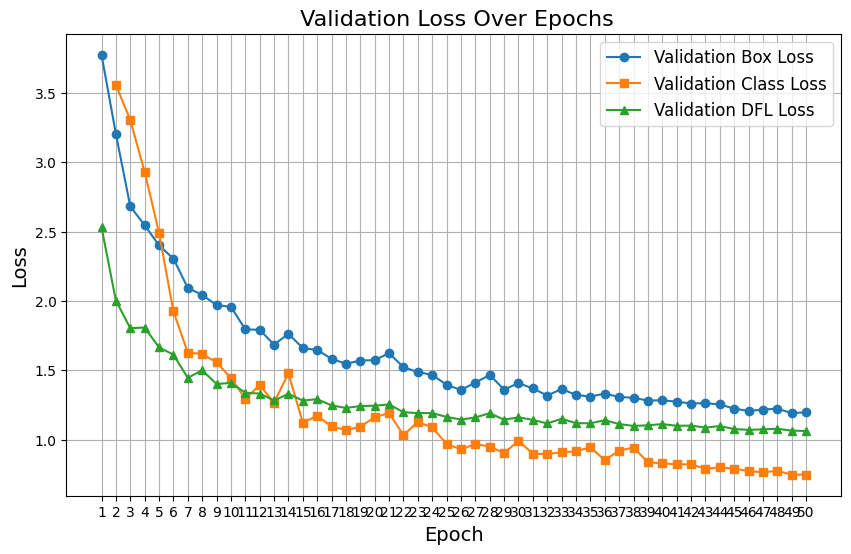

 Validation loss convergence plot 
 Validation loss convergence plot saved at: /kaggle/outputs/validation_loss_convergence.png


<Figure size 640x480 with 0 Axes>

In [13]:

results_csv_path = '/kaggle/working/yolo_training/solar_panel_detection/results.csv'
results_df = pd.read_csv(results_csv_path)

plt.figure(figsize=(10, 6))
plt.plot(results_df.index + 1, results_df['val/box_loss'], label='Validation Box Loss', marker='o')
plt.plot(results_df.index + 1, results_df['val/cls_loss'], label='Validation Class Loss', marker='s')
plt.plot(results_df.index + 1, results_df['val/dfl_loss'], label='Validation DFL Loss', marker='^')

plt.title(' Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(range(1, len(results_df) + 1))
plt.show()
print(" Validation loss convergence plot ")

# Save for future use
plot_path = '/kaggle/outputs/validation_loss_convergence.png'
plt.savefig(plot_path)
print(f" Validation loss convergence plot saved at: {plot_path}")

# Observations

- The plot shows convergence of the validation loss during the 50 epochs

In [14]:
import shutil
shutil.make_archive('/kaggle/working/solar_panel_detection', 'zip', 
                    '/kaggle/working/yolo_training/solar_panel_detection')


'/kaggle/working/solar_panel_detection.zip'

### Predict solar panels using the trained model. Visualize the ground truth and predicted bounding boxes on 3-4 random samples from the test dataset. Use appropriate color schemes to differentiate between ground truth and predicted labels.


In [15]:
from ultralytics import YOLO

In [16]:
model = YOLO('/kaggle/outputs/solar_panel_model_backup/best.pt')

Selected Test Images: ['solarpanels_native_2__x0_15660_y0_14047_dxdy_416.tif', 'solarpanels_native_1__x0_1249_y0_6078_dxdy_416.tif', 'solarpanels_native_1__x0_1763_y0_6695_dxdy_416.tif', 'solarpanels_native_2__x0_3638_y0_13147_dxdy_416.tif']


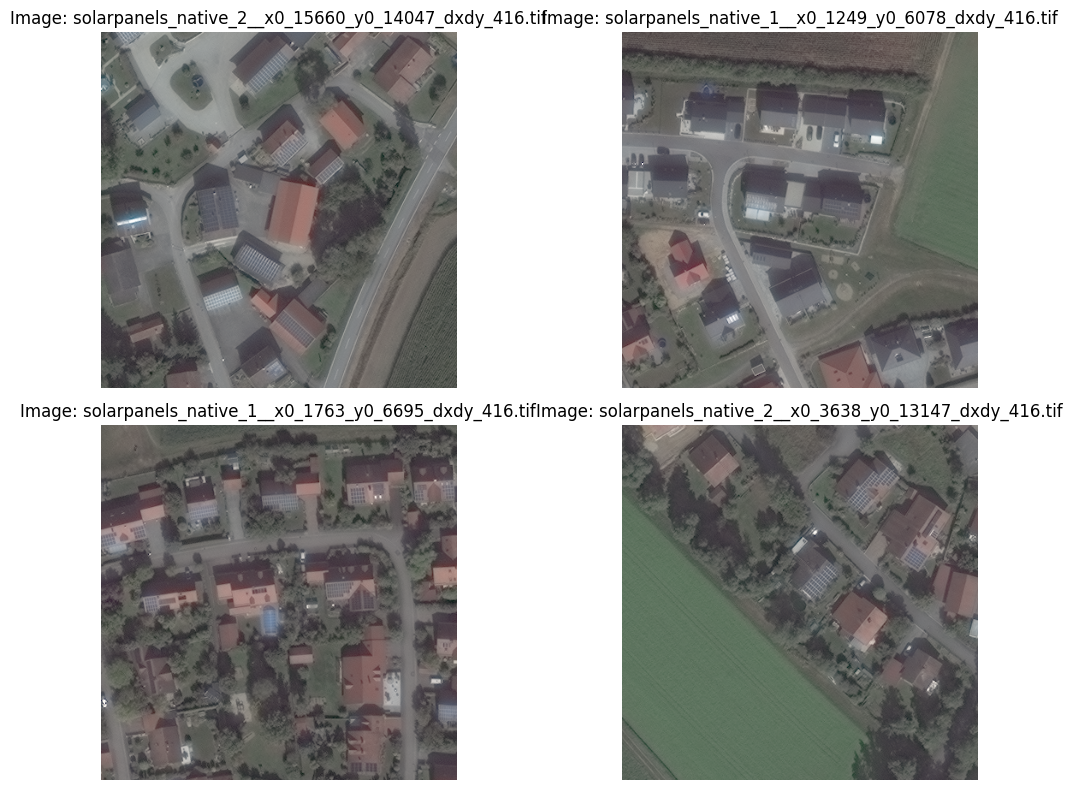

In [17]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

test_images_dir = '/kaggle/working/dataset/images/test'
test_images = os.listdir(test_images_dir)

random_images = random.sample(test_images, 4)
print("Selected Test Images:", random_images)


plt.figure(figsize=(12, 8))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(test_images_dir, img_name)
    img = Image.open(img_path)

    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(f"Image: {img_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [18]:
results = model.predict(
    source = [os.path.join(test_images_dir, img) for img in random_images],
    save = False,
    conf = 0.25,
    show= False
)


0: 416x416 10 solar_panels, 8.8ms
1: 416x416 3 solar_panels, 8.8ms
2: 416x416 18 solar_panels, 8.8ms
3: 416x416 4 solar_panels, 8.8ms
Speed: 0.6ms preprocess, 8.8ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 416)


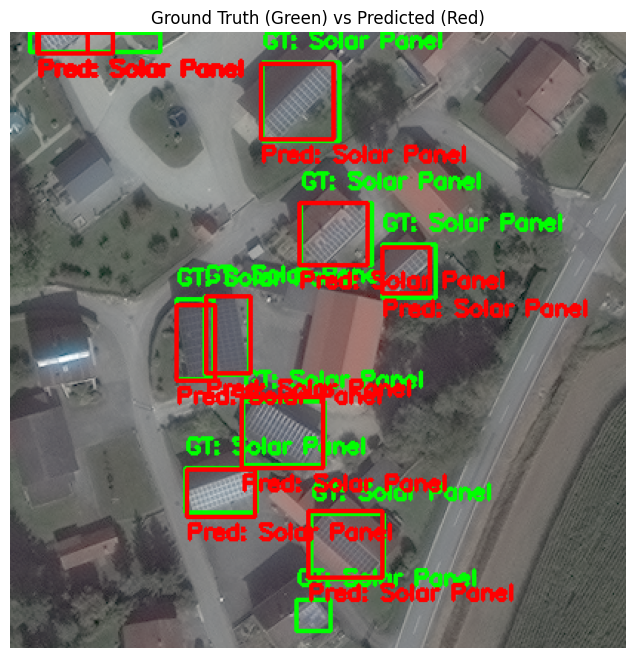

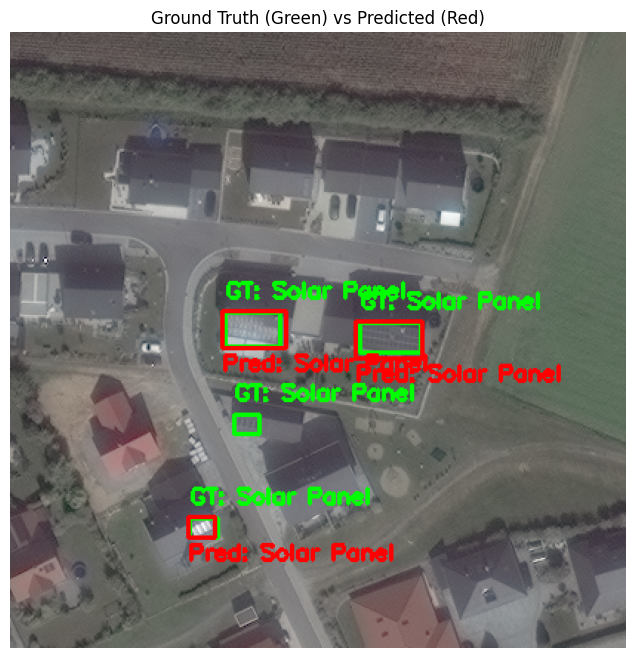

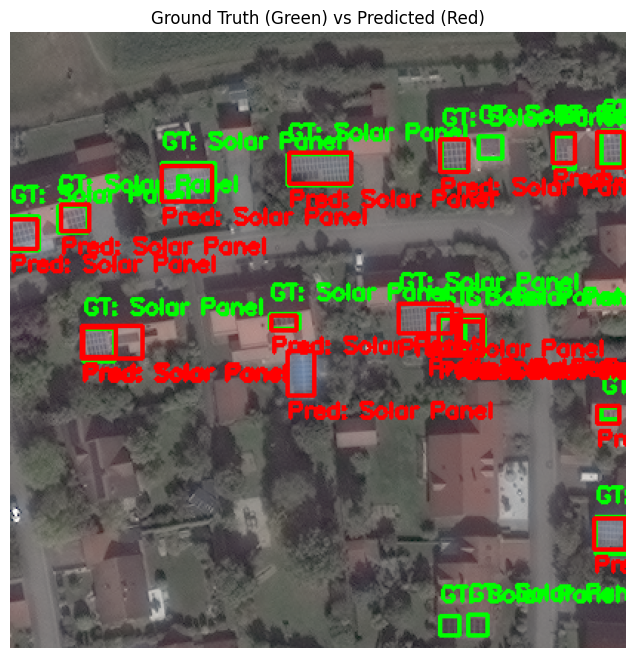

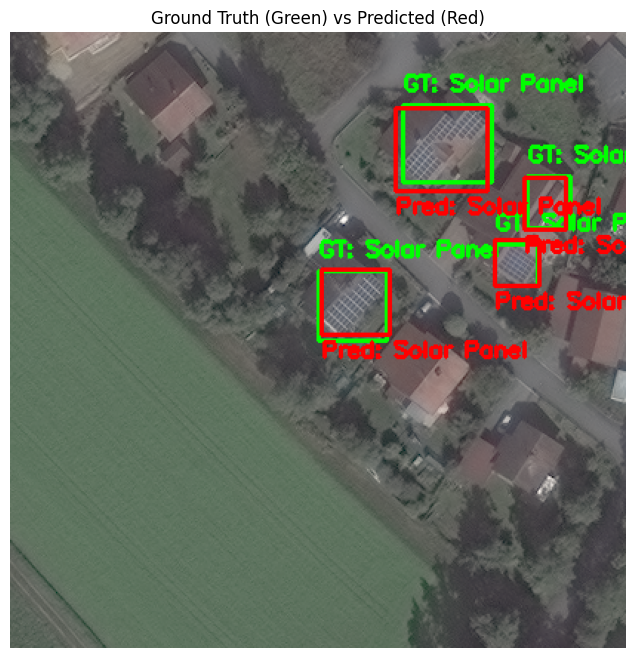

In [19]:
import cv2
import matplotlib.pyplot as plt

def plot_ground_truth_and_predictions(image_path, pred_results, labels_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ground_truth in green
    with open(labels_path, 'r') as f:
        for line in f.readlines():
            cls, x_center, y_center, width, height = map(float, line.strip().split())
            h, w, _ = image.shape
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  
            cv2.putText(image, 'GT: Solar Panel', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Predictions in red
    for box in pred_results.boxes.xyxy.cpu().numpy():
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  
        cv2.putText(image, 'Pred: Solar Panel', (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Ground Truth (Green) vs Predicted (Red)")
    plt.show()

for i, img_name in enumerate(random_images):
    img_path = os.path.join(test_images_dir, img_name)
    label_name = img_name
    for ext in ['.jpg', '.jpeg', '.png', '.tif']: 
        label_name = label_name.replace(ext, '.txt')
    label_path = os.path.join('/kaggle/working/dataset/labels/test', label_name)

    # Just cheking if label files exist or not
    if not os.path.exists(label_path):
        print(f"Label file not found for {img_name} at {label_path}")
        continue

    plot_ground_truth_and_predictions(img_path, results[i], label_path)


### Use supervision.metrics functionality from supervision library to compute the following metrics

## Compute mAP50 with supervision and compare with your implementation. What do you observe 

In [20]:
from ultralytics import YOLO

model = YOLO('/kaggle/working/yolo_training/solar_panel_detection/weights/best.pt')
metrics = model.val(data='/kaggle/working/dataset/data.yaml', split='test')

# mAP@50 score
print(f"mAP@50: {metrics.box.map50:.4f}")


Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/dataset/labels/test... 509 images, 0 backgrounds, 0 corrupt: 100%|██████████| 509/509 [00:00<00:00, 844.33it/s]


val: New cache created: /kaggle/working/dataset/labels/test.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.75it/s]


                   all        509       6260      0.883      0.765      0.861      0.587


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.3ms preprocess, 1.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
mAP@50: 0.8606


In [21]:
!pip install -U supervision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.6 MB/s eta 0:00:00


#### Using Supervision Library to calculate map50

In [22]:
import torch
from ultralytics import YOLO
import supervision as sv  # Import supervision library
import numpy as np
import cv2
import glob


In [25]:
import os
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import supervision as sv
from supervision.metrics import MeanAveragePrecision

# Calculating map@50 with Supervision Library

In [26]:
import os
import cv2
from ultralytics import YOLO  # Ensure you import YOLO correctly

# We will calculate the map@50 with the grounded truth labels in the test set and the predictions for the same images in test set
ground_truth_path = '/kaggle/working/dataset/labels/test/'  # For test set
image_path = '/kaggle/working/dataset/images/test/'  # Image dataset for prediction
predicted_path = 'runs/detect/test/labels/'  # Predicted labels after inference

# checking if the predicted path exist
os.makedirs(predicted_path, exist_ok=True)

model = YOLO('/kaggle/working/yolo_training/solar_panel_detection/weights/best.pt')  

# Before implementing the code, I understand that we need to store all the ground truth 
# and predicted label text data into a proper format, ie, detections object of the 
# supervision library) to ensure proper comparison. This allows us to compute metrics 
# like mAP@50 accurately. The ground truth labels are loaded first, followed by model 
# predictions, which are saved and then parsed into a comparable format.

detections_in_ground_truth = []
detections_predicted_by_model = []

# Load Ground Truth Detections
for label_file in os.listdir(ground_truth_path):
    with open(os.path.join(ground_truth_path, label_file), 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            detections_in_ground_truth.append({
                "image": label_file.replace('.txt', ''),
                "class_id": int(class_id),
                "bbox": [x_center, y_center, width, height]
            })

# Make predictions and save it into the predictions path
for image_file in os.listdir(image_path):
    if image_file.endswith(('.jpg', '.png', '.tif', '.jpeg')):
        image = cv2.imread(os.path.join(image_path, image_file))
        results = model(image) 
        pred_label_file = os.path.join(predicted_path, image_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.tif', '.txt').replace('.jpeg', '.txt'))
        
        # predictions to the text file
        with open(pred_label_file, 'w') as f:
            for result in results:
                for box in result.boxes:
                    class_id = int(box.cls)
                    x_center, y_center, width, height = box.xywhn[0].tolist()  # Normalized coordinates
                    confidence = box.conf.item()
                    f.write(f"{class_id} {x_center} {y_center} {width} {height} {confidence}\n")

        # Load predicted detections into list
        with open(pred_label_file, 'r') as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                class_id, x_center, y_center, width, height, confidence = parts
                detections_predicted_by_model.append({
                    "image": image_file.replace('.txt', ''),
                    "class_id": int(class_id),
                    "bbox": [x_center, y_center, width, height],
                    "confidence": confidence
                })

print(f"Ground Truth Detections ({len(detections_in_ground_truth)}):\n", detections_in_ground_truth[:5])
print(f"Predicted Detections ({len(detections_predicted_by_model)}):\n", detections_predicted_by_model[:5])


0: 416x416 46 solar_panels, 5.4ms
Speed: 0.9ms preprocess, 5.4ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 solar_panels, 5.6ms
Speed: 2.3ms preprocess, 5.6ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 27 solar_panels, 5.7ms
Speed: 1.5ms preprocess, 5.7ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 8 solar_panels, 5.8ms
Speed: 1.1ms preprocess, 5.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 3 solar_panels, 5.6ms
Speed: 0.9ms preprocess, 5.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 5 solar_panels, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 50 solar_panels, 5.6ms
Speed: 1.0ms preprocess, 5.6ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 40 solar_panels, 5.8ms
Speed: 1.3ms preprocess, 5.8ms inference, 1.1ms post

### Initially my code was not running because of some issues like lengths of the predictions array and grounded_truth lists are not same, So I was checking this 

In [27]:
ground_truth_files = os.listdir(ground_truth_path)
image_files = os.listdir(image_path)

print(f"Ground Truth Files: {ground_truth_files}")
print(f"Image Files: {image_files}")

# Checking if the files match between the two directories
# Assuming ground truth files have the same name as the images (e.g., 'image1.txt' and 'image1.jpg')
ground_truth_names = set(file.replace('.txt', '') for file in ground_truth_files)
image_names = set(file.replace('.jpg', '').replace('.png', '').replace('.jpeg', '').replace('.tif', '') for file in image_files)

# Compare the names of the ground truth and image files
common_files = ground_truth_names.intersection(image_names)
missing_images = ground_truth_names - image_names
missing_ground_truths = image_names - ground_truth_names

print(f"Common Files: {common_files}")
print(f"Missing Image Files for Ground Truths: {missing_images}")
print(f"Missing Ground Truths for Image Files: {missing_ground_truths}")


Ground Truth Files: ['solarpanels_native_3__x0_10389_y0_1393_dxdy_416.txt', 'solarpanels_native_2__x0_953_y0_10448_dxdy_416.txt', 'solarpanels_native_1__x0_3122_y0_12828_dxdy_416.txt', 'solarpanels_native_3__x0_4775_y0_13883_dxdy_416.txt', 'solarpanels_native_2__x0_9155_y0_3809_dxdy_416.txt', 'solarpanels_native_3__x0_12356_y0_6355_dxdy_416.txt', 'solarpanels_native_3__x0_5148_y0_13138_dxdy_416.txt', 'solarpanels_native_3__x0_3069_y0_3749_dxdy_416.txt', 'solarpanels_native_2__x0_2418_y0_4551_dxdy_416.txt', 'solarpanels_native_1__x0_6989_y0_9623_dxdy_416.txt', 'solarpanels_native_3__x0_9936_y0_9929_dxdy_416.txt', 'solarpanels_native_1__x0_1348_y0_9316_dxdy_416.txt', 'solarpanels_native_2__x0_611_y0_10731_dxdy_416.txt', 'solarpanels_native_3__x0_3369_y0_0_dxdy_416.txt', 'solarpanels_native_1__x0_8050_y0_8562_dxdy_416.txt', 'solarpanels_native_2__x0_591_y0_11197_dxdy_416.txt', 'solarpanels_native_3__x0_6405_y0_10688_dxdy_416.txt', 'solarpanels_native_1__x0_8670_y0_11147_dxdy_416.txt', 'so

### When I was comparing for calculating map@50, the labels were not matching initially, due to which I was getting direct map@50 as 0, whereas the map@50 I calculated using my training model was considerably near 0.8 to 0.9 range, So I sorted the list of predictions and grounded truths

In [29]:
# Sort them by name
detections_in_ground_truth.sort(key=lambda x: x["image"])

detections_predicted_by_model.sort(key=lambda x: x["image"])

### In predictions, there was .tif name included in the end for images, but for grounded truths only the image name was there which could be leading to comparison issues, so I changed them

In [30]:
for pred in detections_predicted_by_model:
    pred["image"] = pred["image"].replace(".tif", "")

In [31]:
def xywh_to_xyxy(bbox):
    x_center, y_center, width, height = bbox
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2
    return [x_min, y_min, x_max, y_max]

# Converting their format
for gt in detections_in_ground_truth:
    gt["bbox"] = xywh_to_xyxy(gt["bbox"])

for pred in detections_predicted_by_model:
    pred["bbox"] = xywh_to_xyxy(pred["bbox"])

In [32]:
print("First 5 Ground Truth Detections:")
for gt in detections_in_ground_truth[:29]:
    print(gt)

print("\nFirst 5 Predicted Detections:")
for pred in detections_predicted_by_model[:29]:
    print(pred)

First 5 Ground Truth Detections:
{'image': 'solarpanels_native_1__x0_10055_y0_11061_dxdy_416', 'class_id': 0, 'bbox': [0.96875, 0.536058, 1.0, 0.603366]}
{'image': 'solarpanels_native_1__x0_10055_y0_11061_dxdy_416', 'class_id': 0, 'bbox': [0.8389420000000001, 0.7572115, 0.875, 0.7764425]}
{'image': 'solarpanels_native_1__x0_10055_y0_11061_dxdy_416', 'class_id': 0, 'bbox': [0.5120195, 0.302885, 0.5552885, 0.329327]}
{'image': 'solarpanels_native_1__x0_10055_y0_11061_dxdy_416', 'class_id': 0, 'bbox': [0.461538, 0.3028845, 0.492788, 0.31971150000000004]}
{'image': 'solarpanels_native_1__x0_10055_y0_11061_dxdy_416', 'class_id': 0, 'bbox': [0.579327, 0.3124995, 0.677885, 0.3605765]}
{'image': 'solarpanels_native_1__x0_10055_y0_11061_dxdy_416', 'class_id': 0, 'bbox': [0.3293265, 0.540866, 0.3798075, 0.567308]}
{'image': 'solarpanels_native_1__x0_10055_y0_11061_dxdy_416', 'class_id': 0, 'bbox': [0.0, 0.45192350000000003, 0.0625, 0.4975965]}
{'image': 'solarpanels_native_1__x0_10313_y0_12985_d

In [34]:
# Unique image names from ground truth and predictions
gt_images = set(gt["image"] for gt in detections_in_ground_truth)
pred_images = set(pred["image"] for pred in detections_predicted_by_model)

common_images = gt_images.intersection(pred_images)

print(f"Number of common images: {len(common_images)}")

Number of common images: 502


In [35]:
!pip install supervision

In [36]:
from collections import defaultdict

# Group ground truth detections by image
gt_by_image = defaultdict(list)
for gt in detections_in_ground_truth:
    gt_by_image[gt["image"]].append(gt)

# Group predicted detections by image
pred_by_image = defaultdict(list)
for pred in detections_predicted_by_model:
    pred_by_image[pred["image"]].append(pred)

In [37]:
# Filter to include only common images
common_images = gt_images.intersection(pred_images)

# Create lists of ground truth and predictions for common images
filtered_ground_truth = []
filtered_predictions = []

for image_name in common_images:
    filtered_ground_truth.extend(gt_by_image[image_name])
    filtered_predictions.extend(pred_by_image[image_name])

In [39]:
print(f"Filtered Ground Truth Detections: {len(filtered_ground_truth)}")
print(f"Filtered Predicted Detections: {len(filtered_predictions)}")

Filtered Ground Truth Detections: 6236
Filtered Predicted Detections: 6781


In [43]:
import numpy as np
import torch
from torchvision.ops import nms
import supervision as sv
from supervision.metrics import MeanAveragePrecision
from collections import defaultdict

# Apply NMS to remove redundant detections
def apply_nms(predictions, iou_threshold=0.5):
    if not predictions:
        return []

    boxes = torch.tensor([p["bbox"] for p in predictions])
    scores = torch.tensor([p["confidence"] for p in predictions])

    keep = nms(boxes, scores, iou_threshold)
    return [predictions[i] for i in keep]

# Convert predictions to Supervision's format
def convert_to_detections(predictions, is_ground_truth=False):
    if not predictions:
        return sv.Detections.empty()

    boxes = np.array([p["bbox"] for p in predictions])
    class_ids = np.array([p["class_id"] for p in predictions])
    confidence = np.ones(len(predictions)) if is_ground_truth else np.array([p["confidence"] for p in predictions])

    return sv.Detections(xyxy=boxes, confidence=confidence, class_id=class_ids)

# Group predictions by image
pred_dict = defaultdict(list)
for pred in detections_predicted_by_model:
    pred_dict[pred["image"]].append(pred)

# Apply NMS for each image
filtered_predictions = []
for img, preds in pred_dict.items():
    filtered_predictions.extend(apply_nms(preds))

# Group ground truth by image
gt_dict = defaultdict(list)
for gt in detections_in_ground_truth:
    gt_dict[gt["image"]].append(gt)

# Calculate mAP
map_evaluator = MeanAveragePrecision()

for img in common_images:
    pred_detections = convert_to_detections([p for p in filtered_predictions if p["image"] == img])
    gt_detections = convert_to_detections(gt_dict[img], is_ground_truth=True)
    map_evaluator.update(pred_detections, gt_detections)

print(f"mAP@50: {map_evaluator.compute().map50:.4f}")

mAP@50: 0.7854


#The map@50 calculated with supervision comes out to be 0.7854 whereas that calculated directly through the model comes out to be 0.8606

The lower mAP@50 in Supervision is likely due to stricter matching conditions, leading to fewer detections being considered true positives compared to the model's direct evaluation.

### Create a table of Precision, Recall and F1-scores where rows are IoU thresholds [0.1, 0.3, 0.5, 0.7, 0.9] and columns are confidence thresholds [0.1, 0.3, 0.5, 0.7, 0.9] (Hint use supervision.metrics.ConfusionMatrix to get the confusion matrix and get TP, FP and FN from it to compute the P, R and F-1)


In [47]:
import numpy as np
import pandas as pd
import supervision as sv
from collections import defaultdict

# IoU and Confidence Thresholds
iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

# Convert detections into Supervision's format
def convert_to_detections(detections, is_gt=False):
    if not detections:
        return sv.Detections.empty()

    boxes = np.array([d["bbox"] for d in detections])
    class_ids = np.array([d["class_id"] for d in detections])
    confidence = np.ones(len(detections)) if is_gt else np.array([d["confidence"] for d in detections])

    return sv.Detections(xyxy=boxes, confidence=confidence, class_id=class_ids)

# Group detections by image
def group_by_image(detections):
    grouped = defaultdict(list)
    for d in detections:
        grouped[d["image"]].append(d)
    return grouped

# Group ground truth and predictions
gt_grouped = group_by_image(filtered_ground_truth)
pred_grouped = group_by_image(filtered_predictions)

# Get all unique class IDs
all_classes = sorted({d["class_id"] for d in filtered_ground_truth + filtered_predictions})

# Store results
results = []

# Loop through IoU and confidence thresholds
for iou in iou_thresholds:
    for conf in conf_thresholds:
        total_tp, total_fp, total_fn = 0, 0, 0  # Track TP, FP, FN

        for img in gt_grouped:
            if img not in pred_grouped:
                continue

            # Convert detections
            gt_detections = convert_to_detections(gt_grouped[img], is_gt=True)
            pred_detections = convert_to_detections(pred_grouped[img])

            # Filter predictions with confidence threshold
            mask = pred_detections.confidence >= conf
            filtered_preds = sv.Detections(
                xyxy=pred_detections.xyxy[mask],
                confidence=pred_detections.confidence[mask],
                class_id=pred_detections.class_id[mask]
            )

            # confusion matrix
            cm = sv.ConfusionMatrix.from_detections(
                predictions=[filtered_preds],
                targets=[gt_detections],
                classes=all_classes,
                conf_threshold=conf,
                iou_threshold=iou
            )

            total_tp += np.diag(cm.matrix).sum()
            total_fp += cm.matrix.sum(axis=0) - np.diag(cm.matrix)
            total_fn += cm.matrix.sum(axis=1) - np.diag(cm.matrix)

        # Calculate Precision, Recall, and F1-score
        denom_precision = total_tp + total_fp.sum()
        denom_recall = total_tp + total_fn.sum()

        precision = total_tp / denom_precision if denom_precision > 0 else 0
        recall = total_tp / denom_recall if denom_recall > 0 else 0
        f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0


        results.append({"IoU": iou, "Confidence": conf, "Precision": round(precision, 4),
                        "Recall": round(recall, 4), "F1 Score": round(f1_score, 4)})

df_results = pd.DataFrame(results)

# Create tables
precision_table = df_results.pivot(index='IoU', columns='Confidence', values='Precision')
recall_table = df_results.pivot(index='IoU', columns='Confidence', values='Recall')
f1_table = df_results.pivot(index='IoU', columns='Confidence', values='F1 Score')

# Print results
print("Precision Table:\n", precision_table)
print("\nRecall Table:\n", recall_table)
print("\nF1-Score Table:\n", f1_table)


Precision Table:
 Confidence     0.1     0.3     0.5     0.7     0.9
IoU                                               
0.1         0.7678  0.7642  0.6903  0.3960  0.0111
0.3         0.7603  0.7560  0.6866  0.3955  0.0111
0.5         0.7239  0.7213  0.6693  0.3917  0.0111
0.7         0.6008  0.6067  0.5973  0.3840  0.0111
0.9         0.1461  0.1489  0.1627  0.1678  0.0091

Recall Table:
 Confidence     0.1     0.3     0.5     0.7     0.9
IoU                                               
0.1         0.7678  0.7642  0.6903  0.3960  0.0111
0.3         0.7603  0.7560  0.6866  0.3955  0.0111
0.5         0.7239  0.7213  0.6693  0.3917  0.0111
0.7         0.6008  0.6067  0.5973  0.3840  0.0111
0.9         0.1461  0.1489  0.1627  0.1678  0.0091

F1-Score Table:
 Confidence     0.1     0.3     0.5     0.7     0.9
IoU                                               
0.1         0.7678  0.7642  0.6903  0.3960  0.0111
0.3         0.7603  0.7560  0.6866  0.3955  0.0111
0.5         0.7239  0.7213  0.